# Exploración y Recolección de Datos con Joins en Fórmula 1

Este notebook está diseñado para una clase práctica en la que se exploran y recolectan datos mediante la unión (_joins_) de múltiples datasets de Fórmula 1. El objetivo es analizar conjuntamente información procedente de diferentes orígenes para responder preguntas de negocio y obtener insights sobre la historia de la F1.

## Objetivos de la Clase

1. Comprender el uso de joins para combinar tablas utilizando claves comunes (por ejemplo, `raceId` y `driverId`).
2. Explorar la integración de datos provenientes de archivos distintos y su impacto en la información resultante.
3. Responder a preguntas de negocio como:
   - ¿Cuántos pilotos han participado en la F1?
   - ¿Cuál es el circuito que ha sido más utilizado?
   - ¿Qué piloto ha ganado más carreras?
   - ¿Qué piloto ha acumulado más puntos durante su carrera?
4. Interpretar gráficamente resultados y tendencias a lo largo del tiempo.

La idea es que, mediante el uso de operaciones join, los estudiantes unan y analicen datos de varias fuentes (por ejemplo, `races.csv`, `results.csv` y `drivers.csv`) para elaborar un análisis exploratorio completo.

In [35]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/f1stasts_1.zip
!unzip f1stasts_1.zip

--2025-04-10 22:28:44--  https://github.com/javierherrera1996/lecture_analytics/raw/main/f1stasts_1.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/f1stasts_1.zip [following]
--2025-04-10 22:28:44--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/f1stasts_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6183969 (5.9M) [application/zip]
Saving to: ‘f1stasts_1.zip.1’

f1stasts_1.zip.1    100%[===================>]   5.90M  --.-KB/s    in 0.03s   

2025-04-10 22:28:44 (214 MB/s) - ‘f1stasts_1.zip.1’ saved [6183969/6183969

## 1. Carga y Exploración de los Datos

En esta sección se cargan y revisan brevemente los datasets principales:

- **races.csv:** Contiene detalles de cada carrera (año, circuito, fecha, etc.).
- **results.csv:** Registra los resultados de cada carrera (posición, puntos, vueltas, etc.).
- **drivers.csv:** Información sobre cada piloto (nombre, nacionalidad, fecha de nacimiento, etc.).

Asegúrate de tener estos archivos en tu entorno de trabajo.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## 2. Análisis Preliminar y Preparación de los Datos

Antes de realizar las uniones, es importante revisar las columnas clave de cada DataFrame:

- En **races_df** utilizaremos `raceId` para identificar la carrera.
- En **results_df** también se emplea `raceId` y `driverId` para enlazar resultados y pilotos.
- En **drivers_df** `driverId` es la clave para identificar a cada piloto.

Realiza un análisis exploratorio básico (conteos, tipos de dato, detección de nulos) para asegurarte de la calidad de la información.

In [37]:
race_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
drivers_df = pd.read_csv('drivers.csv')

In [38]:
race_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [39]:
for col in race_df.columns:
  race_df.loc[race_df[col]=='\\N',col]= np.nan


In [40]:
race_df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/di

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1.0,2009.0,1.0,1.0,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2009.0,2.0,2.0,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2009.0,3.0,17.0,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2009.0,4.0,3.0,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2009.0,5.0,4.0,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116.0,2023.0,18.0,69.0,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,NaN,NaN,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117.0,2023.0,19.0,32.0,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,NaN,NaN
1098,1118.0,2023.0,20.0,18.0,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,NaN,NaN,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119.0,2023.0,21.0,80.0,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,NaN,NaN


## 3. Integración de Datos mediante Joins

El objetivo es unir la información de las distintas tablas para poder responder a preguntas de negocio. En este ejercicio central, se utilizarán joins para obtener insights combinando datos de carreras, resultados y pilotos.

### 3.1 Unir `results_df` y `drivers_df`

Para analizar la participación y resultados de cada piloto, realizamos un merge entre `results_df` y `drivers_df` utilizando la clave `driverId`.

**Pregunta clave:** ¿Cuántos pilotos distintos han participado en la F1?

Utiliza el DataFrame resultante para explorar esta pregunta.

In [41]:
inner = pd.merge(results_df, drivers_df, on='driverId', how='inner')
inner

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url
0,1,18,1,1,22,1,1,1,1,10.0,...,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,18,2,2,3,5,2,2,2,8.0,...,217.586,1,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,...,216.719,1,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,18,4,4,5,11,4,4,4,5.0,...,215.464,1,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,18,5,1,23,3,5,5,5,4.0,...,218.385,1,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,227.169,1,ricciardo,3,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,228.213,1,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,229.415,1,hulkenberg,27,HUL,Nico,Hülkenberg,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,222.864,130,sainz,55,SAI,Carlos,Sainz,1994-09-01,Spanish,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.


In [42]:
driver_df = pd.read_csv('drivers.csv')
driver_df

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


### 3.2. Unir `df_resultados` con `races_df`

Ahora, para relacionar los resultados con cada carrera, se efectúa la unión entre el DataFrame obtenido (`df_resultados`) y `races_df` a través de la clave `raceId`.

**Pregunta clave:** ¿Qué información adicional sobre cada carrera (fecha, circuito, etc.) se puede incorporar para enriquecer el análisis?

Explora y analiza cómo afecta esta integración en el conjunto de datos final.

In [43]:
inner = pd.merge(inner, race_df, on='raceId', how='inner')
inner

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1,1,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,18,2,2,3,5,2,2,2,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,18,3,3,7,7,3,3,3,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,18,4,4,5,11,4,4,4,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,18,5,1,23,3,5,5,5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,2023-07-28,11:30:00,2023-07-29,10:30:00,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,2023-07-28,11:30:00,2023-07-29,10:30:00,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,2023-07-28,11:30:00,2023-07-29,10:30:00,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,2023-07-28,11:30:00,2023-07-29,10:30:00,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00


## 4. Análisis Conjunto y Ejercicios Interactivos

Con el DataFrame combinado (`df_completo`) podremos responder a varias preguntas de negocio y realizar análisis conjuntos. A continuación se proponen algunos ejercicios:

### Ejercicio 1: Identificar el Circuito Más Utilizado

Utiliza `races_df` y la información del DataFrame combinado para determinar cuál es el circuito (identificado con `circuitId` o el nombre del circuito, si se encuentra) que ha sido sede de la mayor cantidad de carreras.

**Sugerencia:** Usa la función `value_counts()` y discute el resultado con los estudiantes.

In [44]:
value_counts = inner['circuitId'].value_counts()
value_counts

,count
circuitId,
14.0,1796
6.0,1644
9.0,1416
13.0,1238
7.0,1032
...,...
63.0,19
62.0,16
65.0,16


### Ejercicio 2: Piloto con Más Victorias

Filtra el DataFrame combinado para quedarte con aquellos registros donde la posición final (`position`) sea 1, lo que indica una victoria. Luego, agrupa por piloto para determinar quién ha ganado más carreras.

**Pregunta para los estudiantes:** _¿Qué piloto se destaca por su número de victorias y cómo se relaciona este dato con otros indicadores de rendimiento?_

In [47]:
df = pd.read_csv('results.csv')
df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


In [48]:
inner = pd.merge(df, drivers_df, on='driverId', how='inner')
inner

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url
0,1,18,1,1,22,1,1,1,1,10.0,...,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,18,2,2,3,5,2,2,2,8.0,...,217.586,1,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,...,216.719,1,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,18,4,4,5,11,4,4,4,5.0,...,215.464,1,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,18,5,1,23,3,5,5,5,4.0,...,218.385,1,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,227.169,1,ricciardo,3,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,228.213,1,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,229.415,1,hulkenberg,27,HUL,Nico,Hülkenberg,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,222.864,130,sainz,55,SAI,Carlos,Sainz,1994-09-01,Spanish,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.


### Ejercicio 3: Piloto con Más Puntos

Agrupa el DataFrame combinado para sumar el total de puntos (`points`) obtenidos por cada piloto a lo largo de su carrera.

**Pregunta para los estudiantes:** _¿Existe correlación entre el número de victorias y la suma total de puntos? ¿Qué puede influir en esta relación?_

In [49]:
df = pd.read_csv('results.csv')
df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


In [55]:
points = df.groupby('driverId')['points'].sum()
points
Inner = pd.merge(points, drivers_df, on='driverId', how='inner')
Inner


,driverId,points,driverRef,number,code,forename,surname,dob,nationality,url
0,1,4540.5,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,259.0,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,1594.5,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,2203.0,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,105.0,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...,...
852,854,12.0,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,10.0,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu
854,856,2.0,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,27.0,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


### Ejercicio 4: Distribución de Nacionalidades de los Pilotos

Analiza la columna `nationality` presente en `drivers_df` para determinar qué nacionalidades están mejor representadas en la F1. Realiza un gráfico de pastel para visualizar la distribución de pilotos por país.

**Debate:** ¿Qué factores históricos o deportivos crees que puedan explicar esta distribución?

In [82]:
nationality = drivers_df['nationality'].value_counts(). reset_index()
nationality
nationality ["nacionalidad"] = nationality ["nationality"]
nationality

,nationality,count,nacionalidad
0,British,165,British
1,American,158,American
2,Italian,99,Italian
3,French,73,French
4,German,50,German
5,Brazilian,32,Brazilian
6,Argentine,24,Argentine
7,Swiss,23,Swiss
8,Belgian,23,Belgian
9,South African,23,South African


In [85]:
nationality [nationality["count"]<30]["nacionalidad"]= "otros"

<ipython-input-85-5d087e6bb5c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nationality [nationality["count"]<30]["nacionalidad"]= "otros"


In [83]:
nationality.loc[nationality["count"]<30, "nacionalidad" ] = "otros"


In [90]:
nationality = nationality.groupby("nacionalidad").sum().reset_index()

In [91]:
nationality.drop(columns="nationality", inplace=True)

KeyError: "['nationality'] not found in axis"

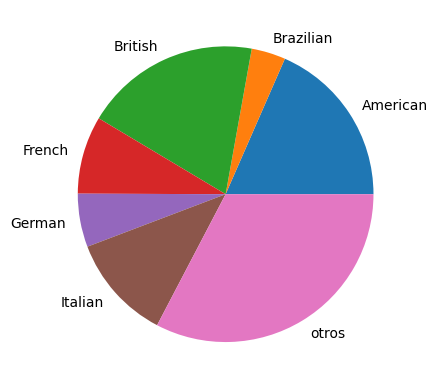

In [92]:
plt.pie(nationality["count"], labels=nationality["nacionalidad"])
plt.show()

### Ejercicio 5: Evolución del Número de Carreras por Año

Genera un gráfico de barras que muestre cómo ha evolucionado el número de carreras a lo largo de los años, utilizando la información de `races_df`.

**Pregunta para los estudiantes:** _¿Qué eventos o cambios en la industria (por ejemplo, crisis, cambios en el reglamento) podrían explicar las variaciones observadas a lo largo de la historia?_

Este ejercicio ayudará a vincular el análisis de datos con contextos históricos y comerciales.

In [93]:
races_df = pd.read_csv('races.csv')
races_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


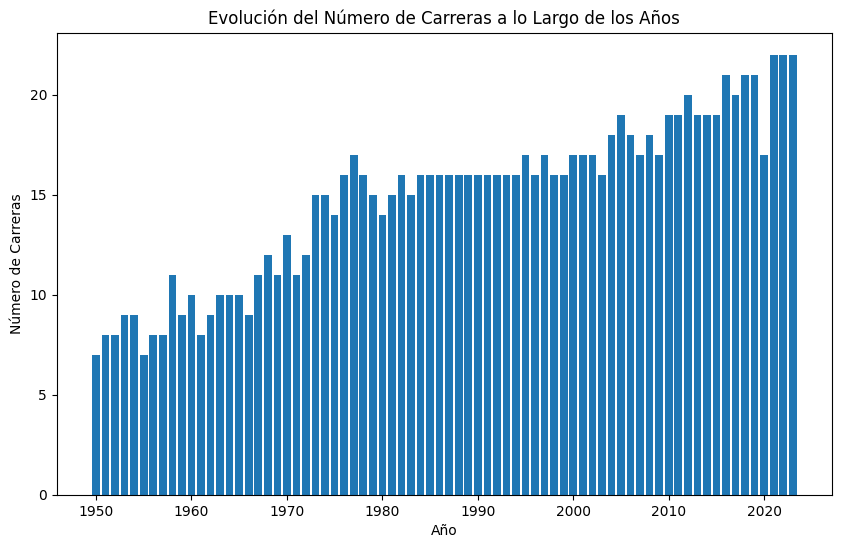

In [96]:
plt.figure(figsize=(10, 6))
plt.bar(races_df['year'], races_df['round'])
plt.xlabel('Año')
plt.ylabel('Número de Carreras')
plt.title('Evolución del Número de Carreras a lo Largo de los Años')
plt.show()

## 5. Preguntas para el Análisis Conjunto y Debate en Clase

Para concluir la actividad, propón a los estudiantes debatir y responder a las siguientes preguntas:

1. **Integración y Calidad de Datos:** ¿Qué inconvenientes pueden surgir al unir tablas que tienen registros incompletos o duplicados? ¿Cómo solucionarlo?
2. **Estrategias de Join:** ¿En qué casos es más adecuado usar un `inner join` y cuándo un `outer join` para evitar perder información relevante?
3. **Insights Negocio:** Basándose en los resultados obtenidos (pilotos con más victorias/puntos, circuitos más usados, etc.), ¿qué estrategias de negocio o insights se podrían extraer para equipos o patrocinadores en la F1?
4. **Análisis Temporal:** ¿Qué relación existe entre los cambios en el número de carreras por año y otros indicadores (como el número de pilotos, eventos destacados, etc.)?

Estas preguntas tienen el objetivo de invitar a un análisis integral de los datos, combinando la técnica de joins con la interpretación y contextualización de los resultados.

SOLUCIÓN DE LAS PREGUNTAS:

1.INTEGRACIÓN Y CALIDAD DE DATOS: Al unir las dos tablas o gráficas con información, pueden encontrarse espacios donde hay faltantes de información
2. ESTRATEGIAS DE JOIN: es adecuado utilizar inner join cuando necesitamos datos concretos o una información mucho más prec

## 6. Conclusión

Este ejercicio integrador ha permitido utilizar joins para combinar distintos orígenes de datos y explorar de manera conjunta información esencial de la Fórmula 1. Se ha trabajado en:

- La identificación de claves y la integración de múltiples datasets.
- La generación de indicadores y visualizaciones útiles para responder preguntas de negocio.
- El análisis crítico y debate sobre la calidad de los datos y la metodología de integración.

Utiliza este notebook como una herramienta para profundizar en la recolección y exploración de datos, incentivando a los estudiantes a buscar conexiones entre la teoría de joins y su aplicación en casos reales.